**Borrelia prediction using clinical data alone with current malaria diagnosis from 2018-2019**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("2018-2019_all_english.csv")

In [5]:
# Count variables with null values
null_counts = df.isnull().sum()
pd.set_option('display.max_rows', len(df.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Unnamed: 0                       0
age                              0
sex                              0
temperature                      0
days of fever                  181
prior antibiotics                3
prior antimalarials             34
prior malaria diagnostic         2
pregnant                       122
headache                         1
body aches                       1
dizziness                        1
vomitting                        1
fatigue/weakness                 2
sore back                        1
chest pain                       1
difficulty breathing             1
rash                             1
sore throat                      1
swelling                         1
bleeding                         1
seizures                         1
loss of consciousness            1
prostration                      1
blood glucose                    6
hemoglobin                      21
contact with febrile person      7
contact with rats                9
recent travel       

In [7]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# import pandas_profiling as pp
# pp.ProfileReport(df)

# Add univariate analysis here?

In [8]:
df1 = df.copy()
df1

,Unnamed: 0,age,sex,temperature,days of fever,prior antibiotics,prior antimalarials,prior malaria diagnostic,pregnant,headache,...,season,year of sample collection,Borrelia,abdominal pain,dental cavity/pain,anorexia,dysphagia,open wound,eye problem,heart rate category
0,SHC0001,46,F,38.4,NaN,2.0,2.0,1.0,2.0,1.0,...,dry,2018,Positive,2,2,2,2,2,2,high
1,SHC0002,10,F,38.1,2.0,2.0,2.0,1.0,2.0,1.0,...,dry,2018,Negative,2,2,2,2,2,2,low
2,SHC0003,12,M,38.9,NaN,2.0,2.0,2.0,NaN,1.0,...,dry,2018,Negative,2,2,2,2,2,2,low
3,SHC0004,10,M,36.0,3.0,2.0,2.0,2.0,NaN,1.0,...,dry,2018,Negative,2,2,2,2,2,2,normal
4,SHC0005,11,F,38.6,NaN,2.0,2.0,1.0,2.0,1.0,...,dry,2018,Negative,2,2,2,2,2,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,SHC1102,26,F,38.0,4.0,2.0,2.0,2.0,2.0,1.0,...,rainy,2019,Negative,2,1,2,2,2,2,high
522,SHC1103,12,M,38.0,3.0,2.0,2.0,1.0,2.0,1.0,...,rainy,2019,Negative,2,2,2,2,2,2,low
523,SHC1104,54,M,37.9,2.0,2.0,2.0,2.0,NaN,1.0,...,rainy,2019,Negative,2,2,2,2,2,2,normal
524,SHC1105,11,F,41.5,2.0,2.0,2.0,2.0,2.0,1.0,...,rainy,2019,Positive,2,2,2,2,2,2,normal


In [9]:
bpos = len(df[df['Borrelia'] == "Positive"])
bneg = len(df[df['Borrelia'] == "Negative"])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df.columns))
print(df.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 39
number of Boleria neg is: 487
                             count      min      max
age                          526.0     2.00    72.00
temperature                  526.0    36.00    41.50
days of fever                345.0     1.00    32.00
prior antibiotics            523.0     1.00     2.00
prior antimalarials          492.0     1.00     2.00
prior malaria diagnostic     524.0     1.00     2.00
pregnant                     404.0     1.00     2.00
headache                     525.0     1.00     2.00
body aches                   525.0     1.00     2.00
dizziness                    525.0     1.00     2.00
vomitting                    525.0     1.00     2.00
fatigue/weakness             524.0     1.00     2.00
sore back                    525.0     1.00     2.00
chest pain                   525.0     1.00     2.00
difficulty breathing         525.0     1.00     2.00
rash                         525.0     1.00     2.00
sore throat                  525.0     1

In [10]:
for i in df.columns:
    print(i,len(df[i].unique()))

Unnamed: 0 526
age 61
sex 3
temperature 49
days of fever 8
prior antibiotics 3
prior antimalarials 3
prior malaria diagnostic 3
pregnant 3
headache 3
body aches 3
dizziness 3
vomitting 3
fatigue/weakness 3
sore back 3
chest pain 3
difficulty breathing 3
rash 3
sore throat 3
swelling 3
bleeding 3
seizures 3
loss of consciousness 3
prostration 3
blood glucose 105
hemoglobin 123
contact with febrile person 3
contact with rats 3
recent travel 3
season 2
year of sample collection 2
Borrelia 2
abdominal pain 2
dental cavity/pain 2
anorexia 2
dysphagia 2
open wound 2
eye problem 2
heart rate category 4


In [11]:
# Delete column temperature, 
df1 = df1.drop(['Unnamed: 0', 'days of fever', 'pregnant',  'sore back', 'seizures', 
               'loss of consciousness', 'prostration', 'year of sample collection', 'dental cavity/pain', 
               'anorexia', 'dysphagia', 'open wound', 'eye problem'], axis=1)


# Print the updated DataFrame
print("Updated DataFrame:")
print(df1)

Updated DataFrame:
     age sex  temperature  prior antibiotics  prior antimalarials  \
0     46   F         38.4                2.0                  2.0   
1     10   F         38.1                2.0                  2.0   
2     12   M         38.9                2.0                  2.0   
3     10   M         36.0                2.0                  2.0   
4     11   F         38.6                2.0                  2.0   
..   ...  ..          ...                ...                  ...   
521   26   F         38.0                2.0                  2.0   
522   12   M         38.0                2.0                  2.0   
523   54   M         37.9                2.0                  2.0   
524   11   F         41.5                2.0                  2.0   
525   15   M         37.9                1.0                  2.0   

     prior malaria diagnostic  headache  body aches  dizziness  vomitting  \
0                         1.0       1.0         1.0        1.0        2.0  

In [12]:
# The value you want to replace
old_value = 'H'

# The value you want to replace with
new_value = 'M'

# Replace the old_value with the new_value in the specified column
df1['sex'] = df1['sex'].replace(old_value, new_value)

print(df1)

     age sex  temperature  prior antibiotics  prior antimalarials  \
0     46   F         38.4                2.0                  2.0   
1     10   F         38.1                2.0                  2.0   
2     12   M         38.9                2.0                  2.0   
3     10   M         36.0                2.0                  2.0   
4     11   F         38.6                2.0                  2.0   
..   ...  ..          ...                ...                  ...   
521   26   F         38.0                2.0                  2.0   
522   12   M         38.0                2.0                  2.0   
523   54   M         37.9                2.0                  2.0   
524   11   F         41.5                2.0                  2.0   
525   15   M         37.9                1.0                  2.0   

     prior malaria diagnostic  headache  body aches  dizziness  vomitting  \
0                         1.0       1.0         1.0        1.0        2.0   
1                

In [13]:
df2 = df1.copy()
df2

,age,sex,temperature,prior antibiotics,prior antimalarials,prior malaria diagnostic,headache,body aches,dizziness,vomitting,...,bleeding,blood glucose,hemoglobin,contact with febrile person,contact with rats,recent travel,season,Borrelia,abdominal pain,heart rate category
0,46,F,38.4,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.98,12.6,2.0,1.0,1.0,dry,Positive,2,high
1,10,F,38.1,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.74,11.9,2.0,2.0,2.0,dry,Negative,2,low
2,12,M,38.9,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.05,13.6,1.0,2.0,2.0,dry,Negative,2,low
3,10,M,36.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.00,16.8,1.0,1.0,1.0,dry,Negative,2,normal
4,11,F,38.6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.01,12.1,1.0,2.0,2.0,dry,Negative,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,26,F,38.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.63,10.2,2.0,2.0,1.0,rainy,Negative,2,high
522,12,M,38.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,1.0,0.94,10.1,1.0,1.0,2.0,rainy,Negative,2,low
523,54,M,37.9,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,0.54,11.1,1.0,1.0,1.0,rainy,Negative,2,normal
524,11,F,41.5,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,NaN,NaN,2.0,1.0,2.0,rainy,Positive,2,normal


In [14]:
# Count variables with null values
null_counts = df2.isnull().sum()
pd.set_option('display.max_rows', len(df2.columns))
print(null_counts)
pd.reset_option('display.max_rows')

age                             0
sex                             0
temperature                     0
prior antibiotics               3
prior antimalarials            34
prior malaria diagnostic        2
headache                        1
body aches                      1
dizziness                       1
vomitting                       1
fatigue/weakness                2
chest pain                      1
difficulty breathing            1
rash                            1
sore throat                     1
swelling                        1
bleeding                        1
blood glucose                   6
hemoglobin                     21
contact with febrile person     7
contact with rats               9
recent travel                  12
season                          0
Borrelia                        0
abdominal pain                  0
heart rate category            24
dtype: int64


In [15]:
df3 = df2.copy()
df3

,age,sex,temperature,prior antibiotics,prior antimalarials,prior malaria diagnostic,headache,body aches,dizziness,vomitting,...,bleeding,blood glucose,hemoglobin,contact with febrile person,contact with rats,recent travel,season,Borrelia,abdominal pain,heart rate category
0,46,F,38.4,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.98,12.6,2.0,1.0,1.0,dry,Positive,2,high
1,10,F,38.1,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.74,11.9,2.0,2.0,2.0,dry,Negative,2,low
2,12,M,38.9,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.05,13.6,1.0,2.0,2.0,dry,Negative,2,low
3,10,M,36.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.00,16.8,1.0,1.0,1.0,dry,Negative,2,normal
4,11,F,38.6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.01,12.1,1.0,2.0,2.0,dry,Negative,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,26,F,38.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.63,10.2,2.0,2.0,1.0,rainy,Negative,2,high
522,12,M,38.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,1.0,0.94,10.1,1.0,1.0,2.0,rainy,Negative,2,low
523,54,M,37.9,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,0.54,11.1,1.0,1.0,1.0,rainy,Negative,2,normal
524,11,F,41.5,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,NaN,NaN,2.0,1.0,2.0,rainy,Positive,2,normal


In [16]:
# Count variables with null values
null_counts = df3.isnull().sum()
pd.set_option('display.max_rows', len(df3.columns))
print(null_counts)
pd.reset_option('display.max_rows')

age                             0
sex                             0
temperature                     0
prior antibiotics               3
prior antimalarials            34
prior malaria diagnostic        2
headache                        1
body aches                      1
dizziness                       1
vomitting                       1
fatigue/weakness                2
chest pain                      1
difficulty breathing            1
rash                            1
sore throat                     1
swelling                        1
bleeding                        1
blood glucose                   6
hemoglobin                     21
contact with febrile person     7
contact with rats               9
recent travel                  12
season                          0
Borrelia                        0
abdominal pain                  0
heart rate category            24
dtype: int64


In [17]:
df_imputed = df3.copy()
df_imputed

,age,sex,temperature,prior antibiotics,prior antimalarials,prior malaria diagnostic,headache,body aches,dizziness,vomitting,...,bleeding,blood glucose,hemoglobin,contact with febrile person,contact with rats,recent travel,season,Borrelia,abdominal pain,heart rate category
0,46,F,38.4,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.98,12.6,2.0,1.0,1.0,dry,Positive,2,high
1,10,F,38.1,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.74,11.9,2.0,2.0,2.0,dry,Negative,2,low
2,12,M,38.9,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.05,13.6,1.0,2.0,2.0,dry,Negative,2,low
3,10,M,36.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.00,16.8,1.0,1.0,1.0,dry,Negative,2,normal
4,11,F,38.6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.01,12.1,1.0,2.0,2.0,dry,Negative,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,26,F,38.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.63,10.2,2.0,2.0,1.0,rainy,Negative,2,high
522,12,M,38.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,1.0,0.94,10.1,1.0,1.0,2.0,rainy,Negative,2,low
523,54,M,37.9,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,0.54,11.1,1.0,1.0,1.0,rainy,Negative,2,normal
524,11,F,41.5,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,NaN,NaN,2.0,1.0,2.0,rainy,Positive,2,normal


In [18]:
#Imputing num_vars

from fancyimpute import IterativeImputer
import pandas as pd

columnsSelected = ['blood glucose', 'hemoglobin']

# Perform multiple imputation using MICE
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(df_imputed[columnsSelected])

# Replace the missing values in the original DataFrame with the imputed values
df_imputed[columnsSelected] = imputed_data

# Display the imputed data
print(df_imputed)

     age sex  temperature  prior antibiotics  prior antimalarials  \
0     46   F         38.4                2.0                  2.0   
1     10   F         38.1                2.0                  2.0   
2     12   M         38.9                2.0                  2.0   
3     10   M         36.0                2.0                  2.0   
4     11   F         38.6                2.0                  2.0   
..   ...  ..          ...                ...                  ...   
521   26   F         38.0                2.0                  2.0   
522   12   M         38.0                2.0                  2.0   
523   54   M         37.9                2.0                  2.0   
524   11   F         41.5                2.0                  2.0   
525   15   M         37.9                1.0                  2.0   

     prior malaria diagnostic  headache  body aches  dizziness  vomitting  \
0                         1.0       1.0         1.0        1.0        2.0   
1                

In [19]:
# Count variables with null values
null_counts = df_imputed.isnull().sum()
pd.set_option('display.max_rows', len(df_imputed.columns))
print(null_counts)
pd.reset_option('display.max_rows')

age                             0
sex                             0
temperature                     0
prior antibiotics               3
prior antimalarials            34
prior malaria diagnostic        2
headache                        1
body aches                      1
dizziness                       1
vomitting                       1
fatigue/weakness                2
chest pain                      1
difficulty breathing            1
rash                            1
sore throat                     1
swelling                        1
bleeding                        1
blood glucose                   0
hemoglobin                      0
contact with febrile person     7
contact with rats               9
recent travel                  12
season                          0
Borrelia                        0
abdominal pain                  0
heart rate category            24
dtype: int64


In [20]:
#Imputing cat_vars in df_imputed dataframe using Mode

def mode_imputation(data, categorical_columns):
    # Make a copy of the original data to avoid modifying the original dataframe
    imputed_data = data.copy()
    
    # Iterate over each column in the list of categorical columns
    for column in categorical_columns:
        # Check if the column contains categorical data (object or categorical type)
        if imputed_data[column].dtype == 'float64' or imputed_data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(imputed_data[column]):
            # Calculate the mode (most frequent value) of the column
            mode_value = imputed_data[column].mode().iloc[0]
            
            # Fill missing values with the mode value
            imputed_data[column].fillna(mode_value, inplace=True)
    
    return imputed_data

columns_to_impute = ['prior antibiotics', 'prior antimalarials',
       'prior malaria diagnostic', 'headache', 'body aches', 'dizziness',
       'vomitting', 'fatigue/weakness', 'chest pain', 'difficulty breathing',
       'rash', 'sore throat', 'swelling', 'bleeding', 'blood glucose',
       'hemoglobin', 'contact with febrile person', 'contact with rats',
       'recent travel', 'heart rate category']

imputed_dataFinal = mode_imputation(df_imputed, columns_to_impute)

imputed_dataFinal

,age,sex,temperature,prior antibiotics,prior antimalarials,prior malaria diagnostic,headache,body aches,dizziness,vomitting,...,bleeding,blood glucose,hemoglobin,contact with febrile person,contact with rats,recent travel,season,Borrelia,abdominal pain,heart rate category
0,46,F,38.4,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.980000,12.600000,2.0,1.0,1.0,dry,Positive,2,high
1,10,F,38.1,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.740000,11.900000,2.0,2.0,2.0,dry,Negative,2,low
2,12,M,38.9,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.050000,13.600000,1.0,2.0,2.0,dry,Negative,2,low
3,10,M,36.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.000000,16.800000,1.0,1.0,1.0,dry,Negative,2,normal
4,11,F,38.6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.010000,12.100000,1.0,2.0,2.0,dry,Negative,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,26,F,38.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.630000,10.200000,2.0,2.0,1.0,rainy,Negative,2,high
522,12,M,38.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,1.0,0.940000,10.100000,1.0,1.0,2.0,rainy,Negative,2,low
523,54,M,37.9,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,0.540000,11.100000,1.0,1.0,1.0,rainy,Negative,2,normal
524,11,F,41.5,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,1.017207,12.931565,2.0,1.0,2.0,rainy,Positive,2,normal


In [21]:
# Count variables with null values
null_counts = imputed_dataFinal.isnull().sum()
pd.set_option('display.max_rows', len(imputed_dataFinal.columns))
print(null_counts)
pd.reset_option('display.max_rows')

age                            0
sex                            0
temperature                    0
prior antibiotics              0
prior antimalarials            0
prior malaria diagnostic       0
headache                       0
body aches                     0
dizziness                      0
vomitting                      0
fatigue/weakness               0
chest pain                     0
difficulty breathing           0
rash                           0
sore throat                    0
swelling                       0
bleeding                       0
blood glucose                  0
hemoglobin                     0
contact with febrile person    0
contact with rats              0
recent travel                  0
season                         0
Borrelia                       0
abdominal pain                 0
heart rate category            0
dtype: int64


In [22]:
df3 = imputed_dataFinal.copy()
df3

,age,sex,temperature,prior antibiotics,prior antimalarials,prior malaria diagnostic,headache,body aches,dizziness,vomitting,...,bleeding,blood glucose,hemoglobin,contact with febrile person,contact with rats,recent travel,season,Borrelia,abdominal pain,heart rate category
0,46,F,38.4,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.980000,12.600000,2.0,1.0,1.0,dry,Positive,2,high
1,10,F,38.1,2.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,0.740000,11.900000,2.0,2.0,2.0,dry,Negative,2,low
2,12,M,38.9,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.050000,13.600000,1.0,2.0,2.0,dry,Negative,2,low
3,10,M,36.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,...,2.0,1.000000,16.800000,1.0,1.0,1.0,dry,Negative,2,normal
4,11,F,38.6,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.010000,12.100000,1.0,2.0,2.0,dry,Negative,2,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,26,F,38.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,2.0,1.630000,10.200000,2.0,2.0,1.0,rainy,Negative,2,high
522,12,M,38.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,1.0,0.940000,10.100000,1.0,1.0,2.0,rainy,Negative,2,low
523,54,M,37.9,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,2.0,0.540000,11.100000,1.0,1.0,1.0,rainy,Negative,2,normal
524,11,F,41.5,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,1.017207,12.931565,2.0,1.0,2.0,rainy,Positive,2,normal


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select ordinal columns to Label encode
columns_to_encode = ['heart rate category']


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in columns_to_encode:
    df3[col + '_encoded'] = label_encoder.fit_transform(df3[col])

print(df3)

     age sex  temperature  prior antibiotics  prior antimalarials  \
0     46   F         38.4                2.0                  2.0   
1     10   F         38.1                2.0                  2.0   
2     12   M         38.9                2.0                  2.0   
3     10   M         36.0                2.0                  2.0   
4     11   F         38.6                2.0                  2.0   
..   ...  ..          ...                ...                  ...   
521   26   F         38.0                2.0                  2.0   
522   12   M         38.0                2.0                  2.0   
523   54   M         37.9                2.0                  2.0   
524   11   F         41.5                2.0                  2.0   
525   15   M         37.9                1.0                  2.0   

     prior malaria diagnostic  headache  body aches  dizziness  vomitting  \
0                         1.0       1.0         1.0        1.0        2.0   
1                

In [24]:
# Delete columns 
df3 = df3.drop(['heart rate category'], axis=1)

In [25]:
# Select columns for OneHot Encoding
# Convert categorical variables to dummy variables (one-hot encoding)
columns_to_encode = ['sex', 'prior antibiotics', 'prior antimalarials',
       'prior malaria diagnostic', 'headache', 'body aches', 'dizziness',
       'vomitting', 'fatigue/weakness', 'chest pain', 'difficulty breathing',
       'rash', 'sore throat', 'swelling', 'bleeding', 'contact with febrile person', 
       'contact with rats', 'recent travel', 'season', 'abdominal pain']
                     
# Perform one-hot encoding
encoded_df = pd.get_dummies(df3, columns=columns_to_encode)

# Print the encoded dataframe
print(encoded_df)

     age  temperature  blood glucose  hemoglobin  Borrelia  \
0     46         38.4       0.980000   12.600000  Positive   
1     10         38.1       0.740000   11.900000  Negative   
2     12         38.9       1.050000   13.600000  Negative   
3     10         36.0       1.000000   16.800000  Negative   
4     11         38.6       1.010000   12.100000  Negative   
..   ...          ...            ...         ...       ...   
521   26         38.0       1.630000   10.200000  Negative   
522   12         38.0       0.940000   10.100000  Negative   
523   54         37.9       0.540000   11.100000  Negative   
524   11         41.5       1.017207   12.931565  Positive   
525   15         37.9       1.100000   12.931547  Negative   

     heart rate category_encoded  sex_F  sex_M  prior antibiotics_1.0  \
0                              0   True  False                  False   
1                              1   True  False                  False   
2                              1  Fa

In [26]:
df4 = encoded_df.copy()
df4

,age,temperature,blood glucose,hemoglobin,Borrelia,heart rate category_encoded,sex_F,sex_M,prior antibiotics_1.0,prior antibiotics_2.0,...,contact with febrile person_1.0,contact with febrile person_2.0,contact with rats_1.0,contact with rats_2.0,recent travel_1.0,recent travel_2.0,season_dry,season_rainy,abdominal pain_1,abdominal pain_2
0,46,38.4,0.980000,12.600000,Positive,0,True,False,False,True,...,False,True,True,False,True,False,True,False,False,True
1,10,38.1,0.740000,11.900000,Negative,1,True,False,False,True,...,False,True,False,True,False,True,True,False,False,True
2,12,38.9,1.050000,13.600000,Negative,1,False,True,False,True,...,True,False,False,True,False,True,True,False,False,True
3,10,36.0,1.000000,16.800000,Negative,2,False,True,False,True,...,True,False,True,False,True,False,True,False,False,True
4,11,38.6,1.010000,12.100000,Negative,2,True,False,False,True,...,True,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,26,38.0,1.630000,10.200000,Negative,0,True,False,False,True,...,False,True,False,True,True,False,False,True,False,True
522,12,38.0,0.940000,10.100000,Negative,1,False,True,False,True,...,True,False,True,False,False,True,False,True,False,True
523,54,37.9,0.540000,11.100000,Negative,2,False,True,False,True,...,True,False,True,False,True,False,False,True,False,True
524,11,41.5,1.017207,12.931565,Positive,2,True,False,False,True,...,False,True,True,False,False,True,False,True,False,True


In [27]:
names_columns = df4.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['age', 'temperature', 'blood glucose', 'hemoglobin', 'Borrelia',
       'heart rate category_encoded', 'sex_F', 'sex_M',
       'prior antibiotics_1.0', 'prior antibiotics_2.0',
       'prior antimalarials_1.0', 'prior antimalarials_2.0',
       'prior malaria diagnostic_1.0', 'prior malaria diagnostic_2.0',
       'headache_1.0', 'headache_2.0', 'body aches_1.0', 'body aches_2.0',
       'dizziness_1.0', 'dizziness_2.0', 'vomitting_1.0', 'vomitting_2.0',
       'fatigue/weakness_1.0', 'fatigue/weakness_2.0', 'chest pain_1.0',
       'chest pain_2.0', 'difficulty breathing_1.0',
       'difficulty breathing_2.0', 'rash_1.0', 'rash_2.0', 'sore throat_1.0',
       'sore throat_2.0', 'swelling_1.0', 'swelling_2.0', 'bleeding_1.0',
       'bleeding_2.0', 'contact with febrile person_1.0',
       'contact with febrile person_2.0', 'contact with rats_1.0',
       'contact with rats_2.0', 'recent travel_1.0', 'recent travel_2.0',
       'season_dry', 'season_rainy', 'abd

In [29]:
 #Delete OneHot Encoded features

# Delete columns 
columns_to_drop = ['sex_M', 'prior antibiotics_2.0', 'prior antimalarials_2.0',
       'prior malaria diagnostic_2.0', 'headache_2.0', 'body aches_2.0', 'dizziness_2.0',
       'vomitting_2.0', 'fatigue/weakness_2.0', 'chest pain_2.0', 'difficulty breathing_2.0',
       'rash_2.0', 'sore throat_2.0', 'swelling_2.0', 'bleeding_2.0', 'contact with febrile person_2.0', 
       'contact with rats_2.0', 'recent travel_2.0', 'season_dry', 'abdominal pain_2']


df4 = encoded_df.drop(columns_to_drop, axis=1)
df4

,age,temperature,blood glucose,hemoglobin,Borrelia,heart rate category_encoded,sex_F,prior antibiotics_1.0,prior antimalarials_1.0,prior malaria diagnostic_1.0,...,difficulty breathing_1.0,rash_1.0,sore throat_1.0,swelling_1.0,bleeding_1.0,contact with febrile person_1.0,contact with rats_1.0,recent travel_1.0,season_rainy,abdominal pain_1
0,46,38.4,0.980000,12.600000,Positive,0,True,False,False,True,...,False,False,False,False,False,False,True,True,False,False
1,10,38.1,0.740000,11.900000,Negative,1,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,12,38.9,1.050000,13.600000,Negative,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,10,36.0,1.000000,16.800000,Negative,2,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
4,11,38.6,1.010000,12.100000,Negative,2,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,26,38.0,1.630000,10.200000,Negative,0,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False
522,12,38.0,0.940000,10.100000,Negative,1,False,False,False,True,...,False,False,True,False,True,True,True,False,True,False
523,54,37.9,0.540000,11.100000,Negative,2,False,False,False,False,...,False,False,True,False,False,True,True,True,True,False
524,11,41.5,1.017207,12.931565,Positive,2,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_scale = ['age', 'temperature', 'blood glucose', 'hemoglobin']

# Standardize numerical features
scaler = StandardScaler()
df4[columns_to_scale] = scaler.fit_transform(df4[columns_to_scale])

print("DataFrame with Standardized Numerical Features:")
print(df4)

DataFrame with Standardized Numerical Features:
          age  temperature  blood glucose  hemoglobin  Borrelia  \
0    1.664053     0.255410  -1.459353e-01   -0.114855  Positive   
1   -0.831038    -0.037921  -1.087284e+00   -0.357338  Negative   
2   -0.692422     0.744295   1.286246e-01    0.231548  Negative   
3   -0.831038    -2.091239  -6.748959e-02    1.340039  Negative   
4   -0.761730     0.450964  -2.826675e-02   -0.288057  Negative   
..        ...          ...            ...         ...       ...   
521  0.277891    -0.135698   2.403550e+00   -0.946224  Negative   
522 -0.692422    -0.135698  -3.028267e-01   -0.980864  Negative   
523  2.218518    -0.233475  -1.871740e+00   -0.634460  Negative   
524 -0.761730     3.286499   8.709221e-16    0.000000  Positive   
525 -0.484498    -0.233475   3.247389e-01   -0.000006  Negative   

     heart rate category_encoded  sex_F  prior antibiotics_1.0  \
0                              0   True                  False   
1              

In [31]:
# Moving target column to the end of dataframe
column_to_move = 'Borrelia'

# Get a list of column names excluding the column to be moved
other_columns = [col for col in df4.columns if col != column_to_move]

# Rearrange the dataframe with the column to be moved as the last column
df4 = df4[other_columns + [column_to_move]]

# Print the updated dataframe
print(df4)

          age  temperature  blood glucose  hemoglobin  \
0    1.664053     0.255410  -1.459353e-01   -0.114855   
1   -0.831038    -0.037921  -1.087284e+00   -0.357338   
2   -0.692422     0.744295   1.286246e-01    0.231548   
3   -0.831038    -2.091239  -6.748959e-02    1.340039   
4   -0.761730     0.450964  -2.826675e-02   -0.288057   
..        ...          ...            ...         ...   
521  0.277891    -0.135698   2.403550e+00   -0.946224   
522 -0.692422    -0.135698  -3.028267e-01   -0.980864   
523  2.218518    -0.233475  -1.871740e+00   -0.634460   
524 -0.761730     3.286499   8.709221e-16    0.000000   
525 -0.484498    -0.233475   3.247389e-01   -0.000006   

     heart rate category_encoded  sex_F  prior antibiotics_1.0  \
0                              0   True                  False   
1                              1   True                  False   
2                              1  False                  False   
3                              2  False            

In [32]:
df5 = df4.copy()
df5

,age,temperature,blood glucose,hemoglobin,heart rate category_encoded,sex_F,prior antibiotics_1.0,prior antimalarials_1.0,prior malaria diagnostic_1.0,headache_1.0,...,rash_1.0,sore throat_1.0,swelling_1.0,bleeding_1.0,contact with febrile person_1.0,contact with rats_1.0,recent travel_1.0,season_rainy,abdominal pain_1,Borrelia
0,1.664053,0.255410,-1.459353e-01,-0.114855,0,True,False,False,True,True,...,False,False,False,False,False,True,True,False,False,Positive
1,-0.831038,-0.037921,-1.087284e+00,-0.357338,1,True,False,False,True,True,...,False,False,True,False,False,False,False,False,False,Negative
2,-0.692422,0.744295,1.286246e-01,0.231548,1,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,Negative
3,-0.831038,-2.091239,-6.748959e-02,1.340039,2,False,False,False,False,True,...,False,False,False,False,True,True,True,False,False,Negative
4,-0.761730,0.450964,-2.826675e-02,-0.288057,2,True,False,False,True,True,...,False,False,False,False,True,False,False,False,False,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.277891,-0.135698,2.403550e+00,-0.946224,0,True,False,False,False,True,...,False,False,False,False,False,False,True,True,False,Negative
522,-0.692422,-0.135698,-3.028267e-01,-0.980864,1,False,False,False,True,True,...,False,True,False,True,True,True,False,True,False,Negative
523,2.218518,-0.233475,-1.871740e+00,-0.634460,2,False,False,False,False,True,...,False,True,False,False,True,True,True,True,False,Negative
524,-0.761730,3.286499,8.709221e-16,0.000000,2,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,Positive


In [33]:
#Coding target variable 'Borrelia' with Positive=1 and Negative=0

# Map positive values to 1 and negative values to 0
df5['Borrelia'] = df5['Borrelia'].apply(lambda x: 1 if x == 'Positive' else 0)

# Print the transformed DataFrame
print(df5)

          age  temperature  blood glucose  hemoglobin  \
0    1.664053     0.255410  -1.459353e-01   -0.114855   
1   -0.831038    -0.037921  -1.087284e+00   -0.357338   
2   -0.692422     0.744295   1.286246e-01    0.231548   
3   -0.831038    -2.091239  -6.748959e-02    1.340039   
4   -0.761730     0.450964  -2.826675e-02   -0.288057   
..        ...          ...            ...         ...   
521  0.277891    -0.135698   2.403550e+00   -0.946224   
522 -0.692422    -0.135698  -3.028267e-01   -0.980864   
523  2.218518    -0.233475  -1.871740e+00   -0.634460   
524 -0.761730     3.286499   8.709221e-16    0.000000   
525 -0.484498    -0.233475   3.247389e-01   -0.000006   

     heart rate category_encoded  sex_F  prior antibiotics_1.0  \
0                              0   True                  False   
1                              1   True                  False   
2                              1  False                  False   
3                              2  False            

**Feature Selection**

In [34]:
bpos = len(df5[df5['Borrelia'] == 1])
bneg = len(df5[df5['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df5.columns))
print(df5.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 39
number of Boleria neg is: 487
                             count       min       max
age                          526.0 -1.385503  3.466063
temperature                  526.0 -2.091239  3.286499
blood glucose                526.0 -1.871740  5.070703
hemoglobin                   526.0 -2.678241  5.358320
heart rate category_encoded  526.0  0.000000  2.000000
Borrelia                     526.0  0.000000  1.000000


In [35]:
#SAVING DF5 INTO A CSV FILE FOR ANALYSIS IN R 
#df5 is a df that is cleaned, imputed, encoded and standardized.. ready for modeling

# Save the DataFrame to a CSV file
# Replace 'output_file.csv' with the desired file name
df5.to_csv('clean2018-2019_all.csv', index=False)  # Set index=False to exclude row numbers in the CSV

**FEATURE SELECTION Plan**
* Using Variance threshold to remove constant and/or semi-constant features
* Removing duplicate features
* Using SelectKBest to compare "f_classif" & "mutual_info_classif" approaches

In [36]:
df5_fselect = df5.copy()
df5_fselect

,age,temperature,blood glucose,hemoglobin,heart rate category_encoded,sex_F,prior antibiotics_1.0,prior antimalarials_1.0,prior malaria diagnostic_1.0,headache_1.0,...,rash_1.0,sore throat_1.0,swelling_1.0,bleeding_1.0,contact with febrile person_1.0,contact with rats_1.0,recent travel_1.0,season_rainy,abdominal pain_1,Borrelia
0,1.664053,0.255410,-1.459353e-01,-0.114855,0,True,False,False,True,True,...,False,False,False,False,False,True,True,False,False,1
1,-0.831038,-0.037921,-1.087284e+00,-0.357338,1,True,False,False,True,True,...,False,False,True,False,False,False,False,False,False,0
2,-0.692422,0.744295,1.286246e-01,0.231548,1,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,0
3,-0.831038,-2.091239,-6.748959e-02,1.340039,2,False,False,False,False,True,...,False,False,False,False,True,True,True,False,False,0
4,-0.761730,0.450964,-2.826675e-02,-0.288057,2,True,False,False,True,True,...,False,False,False,False,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.277891,-0.135698,2.403550e+00,-0.946224,0,True,False,False,False,True,...,False,False,False,False,False,False,True,True,False,0
522,-0.692422,-0.135698,-3.028267e-01,-0.980864,1,False,False,False,True,True,...,False,True,False,True,True,True,False,True,False,0
523,2.218518,-0.233475,-1.871740e+00,-0.634460,2,False,False,False,False,True,...,False,True,False,False,True,True,True,True,False,0
524,-0.761730,3.286499,8.709221e-16,0.000000,2,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,1


In [37]:
# Investigating if there are constant or semi-constant features in df5_fselect
from sklearn.feature_selection import VarianceThreshold

# Removing all features that have variance under 0.01
selector = VarianceThreshold(threshold = 0.01)
selector.fit(df5_fselect)
mask_clean = selector.get_support()
df5_fselect = df5_fselect[df5_fselect.columns[mask_clean]]

# Checking if we really removed some features
# Total of remaning features
df5_fselect.shape[1] #No feature was removed. meaning all features have variance over 0.01

26

In [38]:
# Checking if there is any duplicated column
remove = []
cols = df5_fselect.columns
for i in range(len(cols)-1):
    column = df5_fselect[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(column, df5_fselect[cols[j]].values):
            remove.append(cols[j])


# If yes, than they will be dropped here
df5_fselect.drop(remove, axis = 1, inplace=True)

# Checking if any column was dropped
df5_fselect.shape #No duplicated features

(526, 26)

In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
import statsmodels.api as sm

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df5.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem

# Load your DataFrame (replace 'df' with your DataFrame)
# Make sure to have the target variable 'y' and feature columns 'X'
# For example:
# X = df.drop('target_variable_column', axis=1)
# y = df['target_variable_column']

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
# alphas = [0.1, 0.5, 1.0, 5.0]  # Add more values if needed
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

# Store the coefficient estimates from each iteration
coefficient_samples = []

# Perform optimism bootstrap using KFold cross-validation

for i in range(n_bootstrap):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X_selected, y_resampled):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
        # Fit the weighted logistic regression model to the training data
        weighted_logreg.fit(X_train, y_train)
    
        # Store the coefficient estimates
        coefficient_samples.append(weighted_logreg.coef_[0])

        # Predict on the test set
        y_pred_test = weighted_logreg.predict(X_test)

        # Calculate recall, precision, and F1 score for the test set
        recall_bootstraps.append(recall_score(y_test, y_pred_test))
        precision_bootstraps.append(precision_score(y_test, y_pred_test))
        f1_score_bootstraps.append(f1_score(y_test, y_pred_test))

        # Calculate AUC-ROC curve for the test set
        y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
        auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))

        # Calculate AUC-PR curve for the test set
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
        auc_pr_bootstraps.append(auc(recall_curve, precision_curve))

        # Calculate odds ratio
        odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

# Calculate the confidence intervals for each coefficient
alpha = 0.95  # 95% confidence interval
lower_percentile = (1 - alpha) / 2
upper_percentile = 1 - lower_percentile
confidence_intervals = np.percentile(coefficient_samples, [lower_percentile * 100, upper_percentile * 100], axis=0)

# Print the confidence intervals
columns = X.columns
for i, column in enumerate(selected_features):
    print(f"Coefficient for {column}: {weighted_logreg.coef_[0][i]:.3f} (95% CI: {confidence_intervals[0][i]:.3f}, {confidence_intervals[1][i]:.3f})")

Recall: 0.837 [0.789 - 0.901]
Precision: 0.798 [0.773 - 0.836]
F1 Score: 0.817 [0.781 - 0.854]
AUC-ROC: 0.886 [0.869 - 0.907]
AUC-PR: 0.860 [0.809 - 0.914]
Odds Ratio: 0.591 [0.570 - 0.613]
Coefficient for age: -0.563 (95% CI: -0.563, -0.489)
Coefficient for temperature: 0.713 (95% CI: 0.684, 0.762)
Coefficient for blood glucose: 0.343 (95% CI: 0.340, 0.394)
Coefficient for hemoglobin: 0.057 (95% CI: -0.145, 0.057)
Coefficient for heart rate category_encoded: -0.172 (95% CI: -0.172, -0.045)
Coefficient for sex_F: 0.281 (95% CI: 0.250, 0.326)
Coefficient for prior antibiotics_1.0: -1.662 (95% CI: -1.985, -1.662)
Coefficient for prior malaria diagnostic_1.0: 0.208 (95% CI: 0.100, 0.560)
Coefficient for headache_1.0: 1.712 (95% CI: 1.712, 2.039)
Coefficient for body aches_1.0: 1.536 (95% CI: 1.400, 1.602)
Coefficient for dizziness_1.0: -0.386 (95% CI: -0.428, -0.148)
Coefficient for vomitting_1.0: 2.137 (95% CI: 2.007, 2.235)
Coefficient for fatigue/weakness_1.0: -0.281 (95% CI: -0.281, -

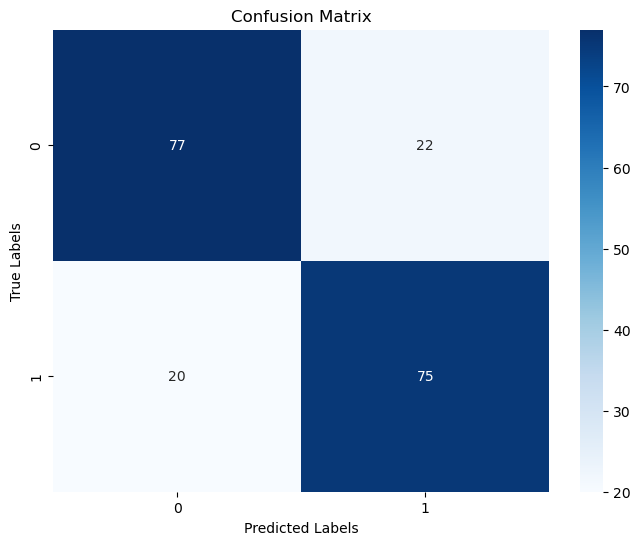

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted probabilities (y_pred_prob_test)
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_test = np.where(y_pred_prob_test >= 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

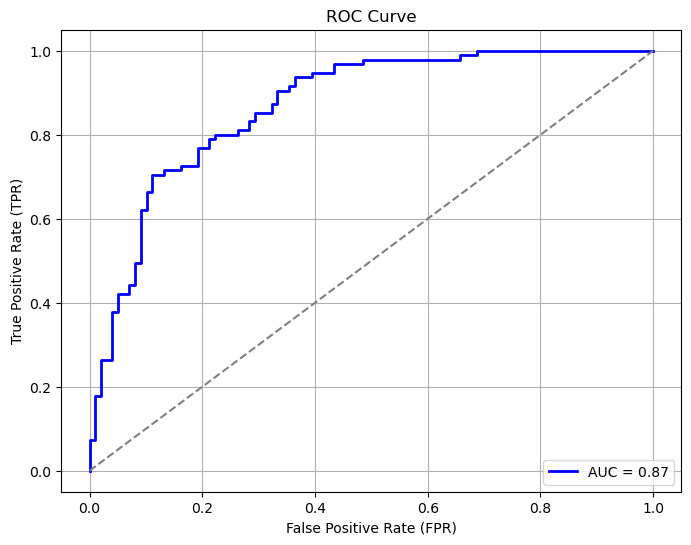

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

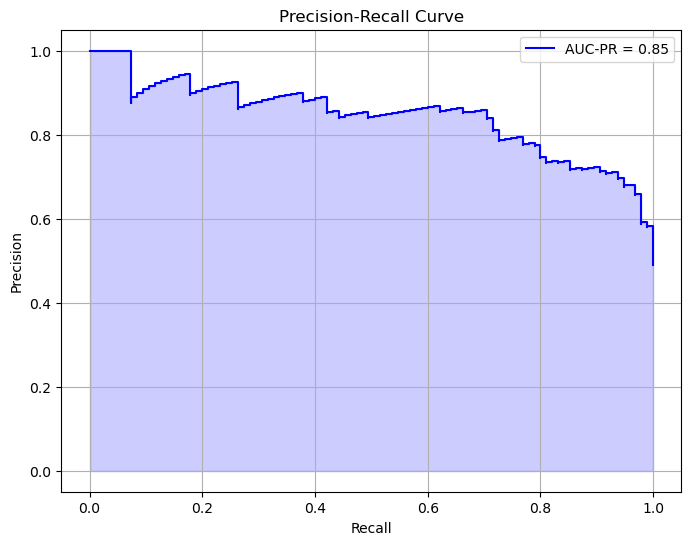

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_test)

# Plot the AUC-PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'AUC-PR = {avg_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [50]:
feature_labels = []
for feat in selected_features:
    if feat == "sex_F":
        feature_labels.append("female")
    elif feat == "heart rate category_encoded":
        feature_labels.append("heart rate")
    elif feat == "season_pluie" or feat == "season_rainy":
        feature_labels.append("rainy season")
    elif feat == "abdominal pain_1":
        feature_labels.append("abdominal pain")        
    else:
        feature_labels.append(feat.replace("_1.0", ""))

feature_labels

['age',
 'temperature',
 'blood glucose',
 'hemoglobin',
 'heart rate',
 'female',
 'prior antibiotics',
 'prior malaria diagnostic',
 'headache',
 'body aches',
 'dizziness',
 'vomitting',
 'fatigue/weakness',
 'chest pain',
 'difficulty breathing',
 'rash',
 'sore throat',
 'swelling',
 'bleeding',
 'contact with febrile person',
 'contact with rats',
 'recent travel',
 'rainy season',
 'abdominal pain']

In [51]:
odds = pd.DataFrame({"2.5%": list(np.exp(confidence_intervals[0])),
                     "97.5%": list(np.exp(confidence_intervals[1])),
                     "Odds Ratio": list(np.exp(weighted_logreg.coef_[0]))}, index=feature_labels)
odds

,2.5%,97.5%,Odds Ratio
age,0.569570,0.613312,0.569570
temperature,1.982065,2.142586,2.039766
blood glucose,1.404934,1.482800,1.409027
hemoglobin,0.865450,1.058866,1.058866
heart rate,0.841666,0.955536,0.841666
female,1.283503,1.385354,1.324874
prior antibiotics,0.137445,0.189820,0.189820
prior malaria diagnostic,1.104664,1.751056,1.230938
headache,5.539672,7.682673,5.539672
body aches,4.055733,4.965123,4.644313


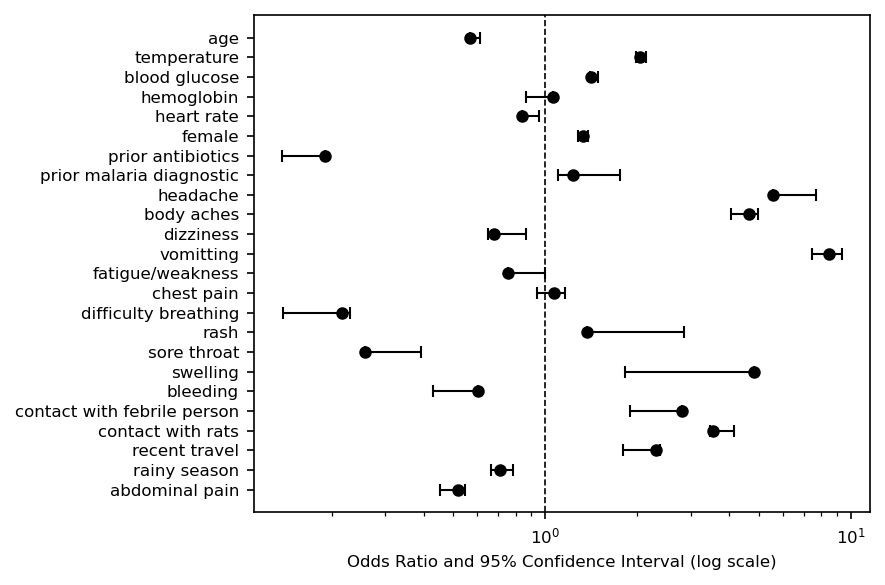

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=150)
ci = [odds.iloc[::-1]['Odds Ratio'] - odds.iloc[::-1]['2.5%'].values, odds.iloc[::-1]['97.5%'].values - odds.iloc[::-1]['Odds Ratio']]
plt.errorbar(x=odds.iloc[::-1]['Odds Ratio'], y=odds.iloc[::-1].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval (log scale)', fontsize=8)
plt.xscale("log")
plt.tight_layout()
plt.savefig('2018-2019-clinical-malaria-or-plot.pdf')
plt.show()